In [1]:
import numpy as np
from astroquery.sdss import SDSS
from astropy import coordinates as coords
from astropy import units as u
import pandas as pd
from astropy.io import fits
from tqdm import tqdm
def get_xid(ra, dec):
    pos = coords.SkyCoord(ra=ra * u.degree, dec=dec * u.degree, frame="icrs")
    xid = SDSS.query_region(pos, spectro=True)
    try:
        return xid.to_pandas()
    except:
        return "nan"

In [2]:
with fits.open("/Users/astre/Downloads/VAGC_MGS-m14_1777--20180116.fits") as hdul:
    table_data = hdul[1].data
    cord = pd.DataFrame({'ra': table_data['RA'], 'dec': table_data['Dec']})
get = pd.DataFrame(columns=['ra', 'dec','objid','run','rerun','camcol','field','z','plate','mjd','fiberID','specobjid', 'run2d'])

In [3]:
import warnings
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

for index, row in tqdm(cord.iterrows()):
    ra = row["ra"]
    dec = row["dec"]
    o = get_xid(ra, dec)
    if type(o) == pd.DataFrame:
        get = get.append(o,ignore_index=True)
    else:
        pass

0it [00:00, ?it/s]/Users/astre/miniforge3/envs/astre/lib/python3.8/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),
92it [01:00,  1.51it/s] 


KeyboardInterrupt: 

In [35]:
get

,ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
0,151.865089,7.14441,1237658300604940408,2986,301,6,223,0.113006,996,52641,419,1121511525366917120,26
1,151.865089,7.14441,1237658300604940408,2986,301,6,223,0.113006,996,52641,419,1121511525366917120,26


In [3]:
sp = SDSS.get_spectra(matches=xid)
im = SDSS.get_images(matches=xid, band='g')

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
im[0][3].data

FITS_rec([(2986, '301', 6, 'g', 95.009682, 7.499589, [2048, 1489], 223, 152.10917082, 0.00011, 4.18511912e-08, 0.83236866, -1.45567214e-08, 0.00010995, 0.03637542, -0.000141, 1.29504716e-07, -3.33695134e-11, 0.01043389, 0.00037135, -7.724415e-07, 3.24744556e-10, 0.0552014, -0.00901651, 0.0828021, -0.01352476, 1.5, 52318.31229101, 1.10895954, 0.0317675, 0.02920656)],
         dtype=(numpy.record, [('RUN', '>i4'), ('RERUN', 'S3'), ('CAMCOL', '>i4'), ('FILTER', 'S1'), ('NODE', '>f8'), ('INCL', '>f8'), ('NAXIS', '>i4', (2,)), ('FIELD', '>i4'), ('A', '>f8'), ('B', '>f8'), ('C', '>f8'), ('D', '>f8'), ('E', '>f8'), ('F', '>f8'), ('DROW0', '>f8'), ('DROW1', '>f8'), ('DROW2', '>f8'), ('DROW3', '>f8'), ('DCOL0', '>f8'), ('DCOL1', '>f8'), ('DCOL2', '>f8'), ('DCOL3', '>f8'), ('CSROW', '>f8'), ('CSCOL', '>f8'), ('CCROW', '>f8'), ('CCCOL', '>f8'), ('RICUT', '>f8'), ('MJD', '>f8'), ('AIRMASS', '>f8'), ('MUERR', '>f4'), ('NUERR', '>f4')]))

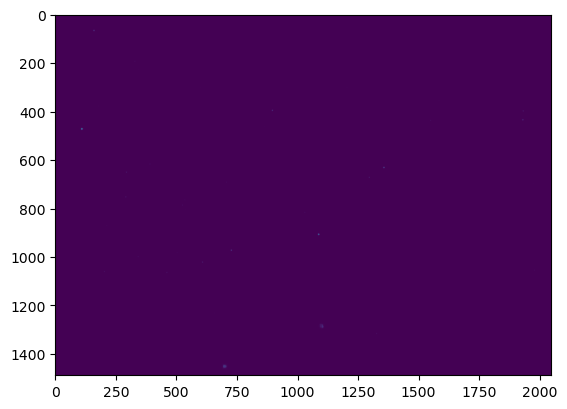

In [11]:
plt.imshow(im[0][0].data)
plt.show()